# Cleaning the Kickers Dataset  
Author: Aidan O'Connor  
Date: 2 March 2021  
This dataset is from kaggle user mur418. It contains data on NFL kickers for 2019 actuals and 2020 projections
#### Import packages and data
![Kansas City Chiefs Kicket, Harrison Butker](https://pbs.twimg.com/media/Er-no7NWMAMMo5O?format=jpg&name=medium)

In [1]:
import pandas as pd # pandas helps to manipulate the dataset
import missingno as msno # bring in missingno to visualize missing datap

In [2]:
# bring in the kickers dataset as a pandas dataframe
df = pd.read_csv('../data/stats_vs_projections/kicker_stats_and_projections.csv')

#### Inspect the dataset's shape, head, and column names

In [3]:
# see how many rows and columns are in this dataset

shape_info = df.shape # set the dataframe's "shape" to a variable

print('This dataset evaluates {} kickers based on data from {} columns' # print this phrase with variables added in
      .format(shape_info[0], # using the .format method, insert the number of rows in the dataframe
              shape_info[1])) # using the .format method, insert the number of columns in the dataframe

This dataset evaluates 50 kickers based on data from 27 columns


In [4]:
df.head(3) # look at the first 3 rows of the kicker dataset

,Unnamed: 0,PLAYER NAME,PLAYER POSITION,TEAM NAME,2019 COMPLETED 1-39,2019 ATTEMPTED 1-39,2019 COMPLETED 40-49,2019 ATTEMPTED 40-49,2019 COMPLETED 50+,2019 ATTEMPTED 50+,...,2020 COMPLETED 40-49,2020 ATTEMPTED 40-49,2020 COMPLETED 50+,2020 ATTEMPTED 50+,2020 COMPLETED TOT,2020 ATTEMPTED TOT,2020 COMPLETED XP,2020 ATTEMPTED XP,2020 FPTS,2020 OUTLOOK
0,1,Harrison Butker,K,Chiefs,18.0,19.0,13.0,13.0,3.0,6.0,...,8.0,10.0,3.0,5.0,26.0,31.0,49.0,51.0,138.35,Butker earned the nickname 'Butt kicker' from ...
1,2,Wil Lutz,K,Saints,16.0,16.0,13.0,15.0,3.0,5.0,...,8.0,10.0,3.0,5.0,27.0,31.0,46.0,48.0,136.70,Lutz has emerged as one of the 'safest' bets a...
2,3,Justin Tucker,K,Ravens,17.0,17.0,10.0,11.0,1.0,1.0,...,8.0,10.0,3.0,5.0,27.0,30.0,43.0,44.0,134.67,It doesn't get much more volatile than kickers...


In [5]:
df.tail(3) # look at the last 3 rows of the kicker dataset

,Unnamed: 0,PLAYER NAME,PLAYER POSITION,TEAM NAME,2019 COMPLETED 1-39,2019 ATTEMPTED 1-39,2019 COMPLETED 40-49,2019 ATTEMPTED 40-49,2019 COMPLETED 50+,2019 ATTEMPTED 50+,...,2020 COMPLETED 40-49,2020 ATTEMPTED 40-49,2020 COMPLETED 50+,2020 ATTEMPTED 50+,2020 COMPLETED TOT,2020 ATTEMPTED TOT,2020 COMPLETED XP,2020 ATTEMPTED XP,2020 FPTS,2020 OUTLOOK
47,48,Ryan Succop,K,Titans,1.0,1.0,0.0,4.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
48,49,Stephen Gostkowski,K,FA,6.0,6.0,1.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
49,50,Tyler Bass,K,Bills,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.


In [6]:
list(df) # Pandas doesn't automatically show all columns, so I'd like to see the column names

['Unnamed: 0',
 'PLAYER NAME',
 'PLAYER POSITION',
 'TEAM NAME',
 '2019 COMPLETED 1-39',
 '2019 ATTEMPTED 1-39',
 '2019 COMPLETED 40-49',
 '2019 ATTEMPTED 40-49',
 '2019 COMPLETED 50+',
 '2019 ATTEMPTED 50+',
 '2019 COMPLETED TOT',
 '2019 ATTEMPTED TOT',
 '2019 COMPLETED XP',
 '2019 ATTEMPTED XP',
 '2019 FPTS',
 '2020 COMPLETED 1-39',
 '2020 ATTEMPTED 1-39',
 '2020 COMPLETED 40-49',
 '2020 ATTEMPTED 40-49',
 '2020 COMPLETED 50+',
 '2020 ATTEMPTED 50+',
 '2020 COMPLETED TOT',
 '2020 ATTEMPTED TOT',
 '2020 COMPLETED XP',
 '2020 ATTEMPTED XP',
 '2020 FPTS',
 '2020 OUTLOOK']

#### Begin cleaning the dataset by improving readability of column names and dropping unnecessary columns

In [7]:
# Start by dropping the following columns:

df = df.drop(
['Unnamed: 0', # this is the original kaggle data users index column that has carried over
 '2020 OUTLOOK'], axis=1) # this column would be useful for an NLP project, but that's not our direction right now

In [8]:
new_shape = df.shape[1] # set number of columns to a variable

print('{} columns have been removed from the dataset' # print a phrase saying how many columns have been removed
      .format( # use the .format() method again to insert variables into a printed string
          abs(new_shape-shape_info[1]))) # show the absolute value between the old and new amounts of columns

2 columns have been removed from the dataset


In [9]:
# Let's remove spaces from old column names

df_old_cols = list(df) # instantiate a new list with old column names in it

df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols] # remove the spaces and make everything lowercase

In [10]:
df_new_cols[0] # make sure it worked by checking the first name

'Playername'

In [11]:
df.columns = df_new_cols # make df_new_cols the column names

df.head(2) # check to make sure that this change stuck

,Playername,Playerposition,Teamname,2019completed1-39,2019attempted1-39,2019completed40-49,2019attempted40-49,2019completed50+,2019attempted50+,2019completedtot,...,2020attempted1-39,2020completed40-49,2020attempted40-49,2020completed50+,2020attempted50+,2020completedtot,2020attemptedtot,2020completedxp,2020attemptedxp,2020fpts
0,Harrison Butker,K,Chiefs,18.0,19.0,13.0,13.0,3.0,6.0,34.0,...,16.0,8.0,10.0,3.0,5.0,26.0,31.0,49.0,51.0,138.35
1,Wil Lutz,K,Saints,16.0,16.0,13.0,15.0,3.0,5.0,32.0,...,16.0,8.0,10.0,3.0,5.0,27.0,31.0,46.0,48.0,136.70


#### Find and determine what to do with values that are "not a number" or "NaN"

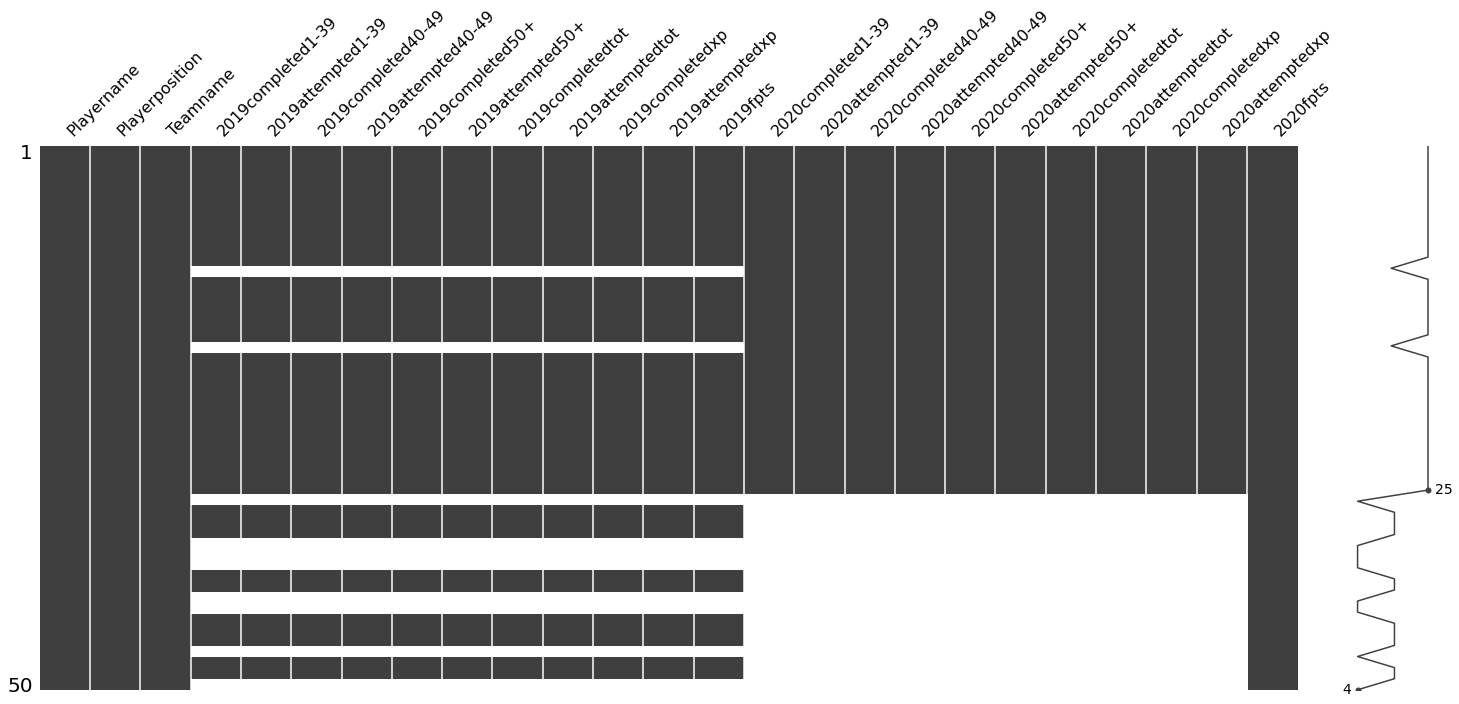

In [12]:
msno.matrix(df) # print a missing numbers matrix to show where missing numbers are

Scrolling back to the head (and with some personal knowledge), it looks like the dataset is sorted by 2020 fantasy point projections (the last column).  
  
What we can gather from this missingno matrix is that a handful of kickers didn't play in the 2019 season.  
  
We can also gather that a number of kickers were not, at the time of the scraping of this data, expected to play in the 2020 season.  
  
I'd like to know this for sure, so let's take a look by digging into one of the columns where there is sparse null data.

In [13]:
df[df['2019fpts'].isna()] # show the dataframe where the 2019fpts is null

,Playername,Playerposition,Teamname,2019completed1-39,2019attempted1-39,2019completed40-49,2019attempted40-49,2019completed50+,2019attempted50+,2019completedtot,...,2020attempted1-39,2020completed40-49,2020attempted40-49,2020completed50+,2020attempted50+,2020completedtot,2020attemptedtot,2020completedxp,2020attemptedxp,2020fpts
11,Sam Sloman,K,Rams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,8.0,10.0,3.0,5.0,27.0,33.0,35.0,38.0,123.92
18,Justin Rohrwasser,K,Patriots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,7.0,10.0,3.0,5.0,26.0,31.0,35.0,38.0,119.92
32,Matthew McCrane,K,Steelers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
36,Chandler Catanzaro,K,FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
37,Giorgio Tavecchio,K,FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
38,Caleb Sturgis,K,FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
41,Phil Dawson,K,FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
42,Sebastian Janikowski,K,FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
46,Graham Gano,K,Panthers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
49,Tyler Bass,K,Bills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


It looks like Sam Sloman and Justin Rohrwasser didn't play in 2019 but were expected to play and gain fantasy points in 2020.  

The rest were free agents at the beginning of the season or were likely backup kickers without expectation to play in 2020.  
  
For the sake of cleaning our data, we'll treat the null values as zeros.

In [14]:
df = df.fillna(0) # use the .fillna() method to fill the NaNs with zeros

In [15]:
df.tail(3) # check out the last 3 rows in the dataset to ensure this filling of null values stuck

,Playername,Playerposition,Teamname,2019completed1-39,2019attempted1-39,2019completed40-49,2019attempted40-49,2019completed50+,2019attempted50+,2019completedtot,...,2020attempted1-39,2020completed40-49,2020attempted40-49,2020completed50+,2020attempted50+,2020completedtot,2020attemptedtot,2020completedxp,2020attemptedxp,2020fpts
47,Ryan Succop,K,Titans,1.0,1.0,0.0,4.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Stephen Gostkowski,K,FA,6.0,6.0,1.0,2.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Tyler Bass,K,Bills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Export the dataframe to a csv

In [16]:
df.to_csv('../data/cleaned_data/cleaned-kicker-data.csv')